In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np


In [2]:
file_path = 'C://Users//Chick//AI-class//diabetes.csv'  
df = pd.read_csv(file_path)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 데이터와 타겟 분리
df = df.drop(columns=['Outcome'], axis=1)
X = df.drop(columns=['BMI'], axis=1)
y = df['BMI']

In [5]:
X = X.values


In [6]:
Y = pd.get_dummies(y).values

In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [8]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [9]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 


((614, 7), (154, 7), (614,), (154,))

In [11]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [12]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 7), (154, 7), (614,), (154,))

In [14]:
# 모델 정의
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 회귀니까 출력 1개

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # [batch_size, 1]
        return x
        
        # Initialize the model, loss function, and optimizer
model = RegressionModel(input_dim=7)


In [15]:
# 손실 함수 및 최적화 기법 정의
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
# 모델 학습
# 손실과 정확도 저장용 리스트
train_losses = []
test_accuracies = []

# 학습 루프
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()

        outputs = model(inputs).squeeze()  # 출력 shape 맞추기
        loss = criterion(outputs, labels.float().squeeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    # 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs).squeeze()
            probs = torch.sigmoid(outputs)
            predicted = (probs > 0.5).int()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1077.3780, Accuracy: 0.00%
Epoch 2/20, Loss: 1027.5219, Accuracy: 0.00%
Epoch 3/20, Loss: 893.3765, Accuracy: 0.00%
Epoch 4/20, Loss: 733.8590, Accuracy: 0.00%
Epoch 5/20, Loss: 524.3568, Accuracy: 0.00%
Epoch 6/20, Loss: 317.1377, Accuracy: 0.00%
Epoch 7/20, Loss: 163.9230, Accuracy: 0.00%
Epoch 8/20, Loss: 101.7901, Accuracy: 0.00%
Epoch 9/20, Loss: 87.1595, Accuracy: 0.00%
Epoch 10/20, Loss: 80.6709, Accuracy: 0.00%
Epoch 11/20, Loss: 75.6984, Accuracy: 0.00%
Epoch 12/20, Loss: 73.1017, Accuracy: 0.00%
Epoch 13/20, Loss: 72.6804, Accuracy: 0.00%
Epoch 14/20, Loss: 69.6265, Accuracy: 0.00%
Epoch 15/20, Loss: 67.9878, Accuracy: 0.00%
Epoch 16/20, Loss: 65.2728, Accuracy: 0.00%
Epoch 17/20, Loss: 65.0411, Accuracy: 0.00%
Epoch 18/20, Loss: 63.0734, Accuracy: 0.00%
Epoch 19/20, Loss: 62.8439, Accuracy: 0.00%
Epoch 20/20, Loss: 61.4358, Accuracy: 0.00%
Training complete.


In [17]:
model.eval()
predictions = []
true_values = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs).squeeze()
        predictions.extend(outputs.numpy())
        true_values.extend(labels.numpy())

predictions = np.array(predictions)
true_values = np.array(true_values)

# 성능 지표
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Test MSE: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Test MSE: 68.7412
Test R2 Score: -0.1581


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(predictions, true_values)
mae = mean_absolute_error(predictions, true_values)
r2 = r2_score(predictions, true_values)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 68.7412
Mean Absolute Error (MAE): 6.1739
R² Score: -0.9010


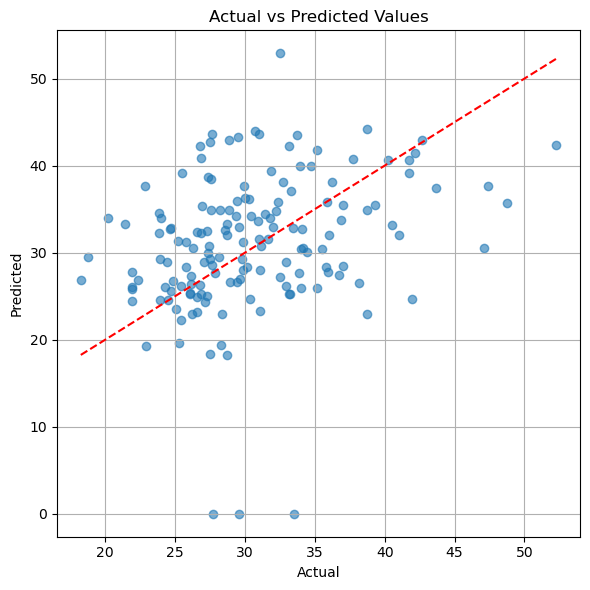

In [19]:
# 결과 시각화
plt.figure(figsize=(6, 6))
plt.scatter(predictions, true_values, alpha=0.6)
plt.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'r--')  # y = x 선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()